In [1]:
import pandas as pd

# 전처리 완료된 데이터 로드
df = pd.read_csv("/Users/bagminsu/Downloads/playground-series-s4e1/train_preprocessed.csv")

df.head()
df.info()
df['Exited'].value_counts(normalize=True)

# 실제 test 데이터 예측에 사용할 X,y로 분리 
X = df.drop(columns=['Exited'])
y = df['Exited']
test_df = pd.read_csv("/Users/bagminsu/Downloads/test_preprocessed.csv")

sub = pd.read_csv("/Users/bagminsu/Downloads/playground-series-s4e1/sample_submission.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CreditScore           165034 non-null  float64
 1   Age                   165034 non-null  float64
 2   Tenure                165034 non-null  int64  
 3   Balance               165034 non-null  float64
 4   NumOfProducts         165034 non-null  float64
 5   HasCrCard             165034 non-null  float64
 6   IsActiveMember        165034 non-null  float64
 7   EstimatedSalary       165034 non-null  float64
 8   Exited                165034 non-null  int64  
 9   Gender_Male           165034 non-null  int64  
 10  Geography_Germany     165034 non-null  int64  
 11  Geography_Spain       165034 non-null  int64  
 12  age_tenure_ratio      165034 non-null  float64
 13  minimal_user          165034 non-null  int64  
 14  economic_maturity     165034 non-null  float64
 15  

In [2]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      110023 non-null  int64  
 1   Exited  110023 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.7 MB


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

X = df.drop(columns=["Exited"])
y = df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 모델 정의 및 학습
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# 예측
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]  # ROC-AUC용

# 성능 평가
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.88      0.95      0.91     26023
           1       0.74      0.52      0.61      6984

    accuracy                           0.86     33007
   macro avg       0.81      0.74      0.76     33007
weighted avg       0.85      0.86      0.85     33007

ROC-AUC: 0.8802803265188046


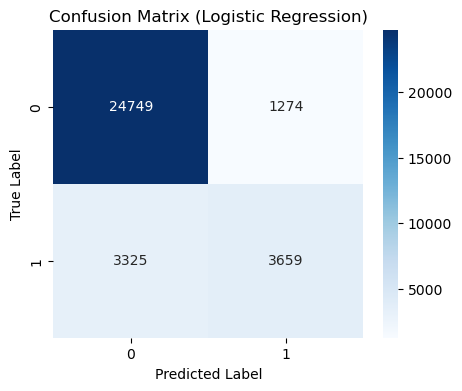

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()


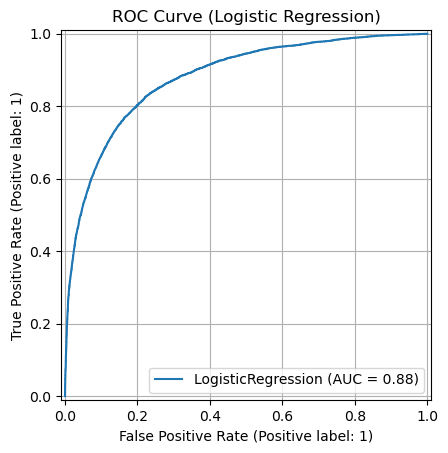

In [30]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.title("ROC Curve (Logistic Regression)")
plt.grid(True)
plt.show()

In [25]:
lr_pca_submission = sub.copy()
sub_proba = logreg.predict_proba(test_df)[:,1]
lr_pca_submission['Exited'] = sub_proba

# 최종 제출 파일 저장
lr_pca_submission.to_csv('/Users/bagminsu/Downloads/playground-series-s4e1/lr_submission.csv', index=False)

In [47]:
from sklearn.neighbors import KNeighborsClassifier 

kn = KNeighborsClassifier(n_neighbors= 100, n_jobs= -1)
kn.fit(X_train, y_train)

# 예측
y_pred = kn.predict(X_test)
y_proba = kn.predict_proba(X_test)[:, 1]  # ROC-AUC용

# 성능 평가
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91     26023
           1       0.75      0.50      0.60      6984

    accuracy                           0.86     33007
   macro avg       0.82      0.73      0.76     33007
weighted avg       0.85      0.86      0.85     33007

ROC-AUC: 0.879700358907987


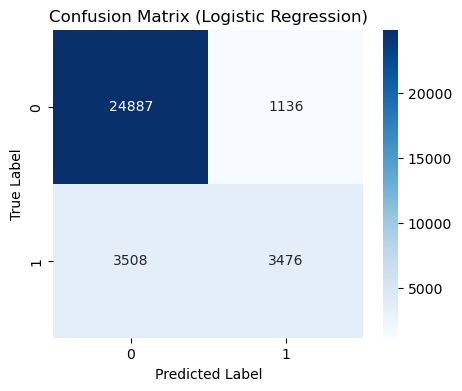

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

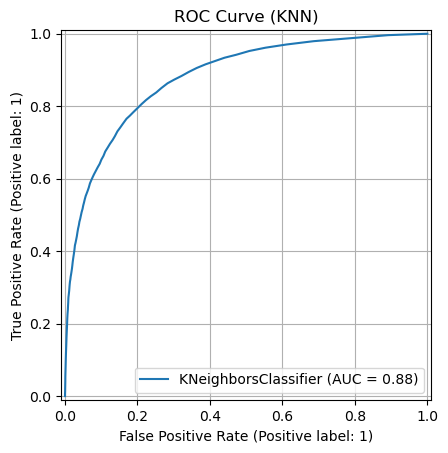

In [32]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(kn, X_test, y_test)
plt.title("ROC Curve (KNN)")
plt.grid(True)
plt.show()

In [34]:
knn_pca_submission = sub.copy()
sub_proba = kn.predict_proba(test_df)[:,1]
knn_pca_submission['Exited'] = sub_proba

# 최종 제출 파일 저장
knn_pca_submission.to_csv('/Users/bagminsu/Downloads/playground-series-s4e1/knn_submission.csv', index=False)

In [5]:
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# 확률 예측
y_pred = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# 성능 평가
print("SVM ROC-AUC:", roc_auc_score(y_test, y_proba_svm))

SVM ROC-AUC: 0.8295307753573706


In [ ]:
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_svm))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     26023
           1       0.76      0.50      0.60      6984

    accuracy                           0.86     33007
   macro avg       0.82      0.73      0.76     33007
weighted avg       0.85      0.86      0.85     33007

ROC-AUC: 0.8295307753573706


In [14]:
sub.info

<bound method DataFrame.info of             id  Exited
0       165034     0.5
1       165035     0.5
2       165036     0.5
3       165037     0.5
4       165038     0.5
...        ...     ...
110018  275052     0.5
110019  275053     0.5
110020  275054     0.5
110021  275055     0.5
110022  275056     0.5

[110023 rows x 2 columns]>

In [15]:
svm_pca_submission = sub.copy()
sub_proba = svm_model.predict_proba(test_df)[:,1]
svm_pca_submission['Exited'] = sub_proba

# 최종 제출 파일 저장
svm_pca_submission.to_csv('/Users/bagminsu/Downloads/playground-series-s4e1/svm_submission.csv', index=False)

In [5]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(svm_model, X_test, y_test)
plt.title("ROC Curve (KNN)")
plt.grid(True)
plt.show()

NameError: name 'svm_model' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs= -1, random_state= 42)
rf.fit(X_train, y_train)

# 확률 예측
y_pred = rf.predict(X_test)
y_proba_svm = rf.predict_proba(X_test)[:, 1]

# 성능 평가
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_svm))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     26023
           1       0.72      0.53      0.61      6984

    accuracy                           0.86     33007
   macro avg       0.80      0.74      0.76     33007
weighted avg       0.85      0.86      0.85     33007

ROC-AUC: 0.8734014190856544


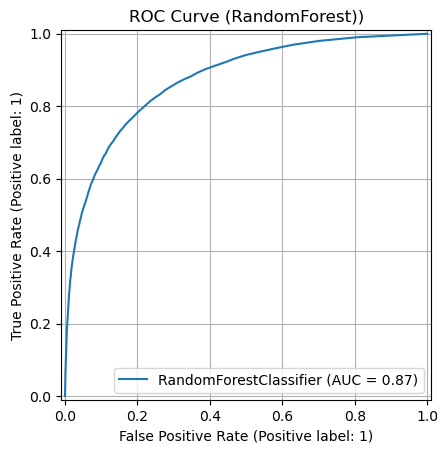

In [11]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve (RandomForest))")
plt.grid(True)
plt.show()

In [14]:
rf_pca_submission = sub.copy()
sub_proba = rf.predict_proba(test_df)[:,1]
rf_pca_submission['Exited'] = sub_proba

# 최종 제출 파일 저장
rf_pca_submission.to_csv('/Users/bagminsu/Downloads/playground-series-s4e1/rf_submission.csv', index=False)

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score


# 1. Voting Classifier 정의
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('rf', RandomForestClassifier(n_jobs=-1, random_state=42)),
        ('xgb', XGBClassifier(
            tree_method="hist", 
            use_label_encoder=False,
            eval_metric="logloss",
            n_jobs=-1,
            random_state=42
        ))
    ],
    voting='soft'  # soft voting: 예측 확률 기반
)

# 2. 모델 학습
voting_clf.fit(X_train, y_train)

# 3. 예측 및 평가
y_pred = voting_clf.predict(X_test)
y_proba = voting_clf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:36:25] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_48ydvcv9e5/croot/xgboost-split_1748329884729/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26023
           1       0.75      0.54      0.63      6984

    accuracy                           0.86     33007
   macro avg       0.82      0.75      0.77     33007
weighted avg       0.86      0.86      0.86     33007

ROC-AUC: 0.8865156083399481


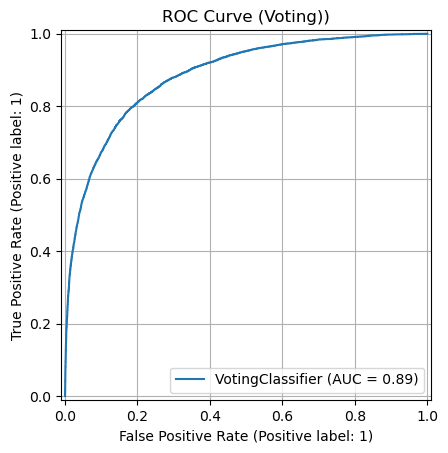

In [18]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(voting_clf, X_test, y_test)
plt.title("ROC Curve (Voting))")
plt.grid(True)
plt.show()

In [19]:
vt_pca_submission = sub.copy()
sub_proba = voting_clf.predict_proba(test_df)[:,1]
vt_pca_submission['Exited'] = sub_proba

# 최종 제출 파일 저장
vt_pca_submission.to_csv('/Users/bagminsu/Downloads/playground-series-s4e1/vt_submission.csv', index=False)

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Base 모델들 정의
base_models = [
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('rf', RandomForestClassifier(n_jobs=-1, random_state=42)),
    ('xgb', XGBClassifier(
        tree_method='hist',
        use_label_encoder=False,
        eval_metric='logloss',
        n_jobs=-1,
        random_state=42
    ))
]

# 2. 메타 모델 정의 (로지스틱 회귀로 설정)
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# 3. StackingClassifier 정의
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=False,  # 원본 특성 사용 여부 (False면 base 모델 예측만)
    cv=5,                # 과적합을 방지하기 위해 base 모델은  5-fold 교차검증 기반 학습
    n_jobs=-1
)

# 4. 학습 및 예측
stacking_clf.fit(X_train, y_train)

y_pred = stacking_clf.predict(X_test)
y_proba = stacking_clf.predict_proba(X_test)[:, 1]

# 5. 성능 평가
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:48:14] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_48ydvcv9e5/croot/xgboost-split_1748329884729/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[01:48:20] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_48ydvcv9e5/croot/xgboost-split_1748329884729/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[01:48:20] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_48ydvcv9e5/croot/xgboost-split_1748329884729/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[01:48:20] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_48ydvcv9e5/croot/xgboost-split_1748329884729/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[01:48:20] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_48ydvcv9e5/croot/xgboost-split_174

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26023
           1       0.75      0.54      0.63      6984

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.77     33007
weighted avg       0.86      0.87      0.86     33007

ROC-AUC: 0.8871552640960532


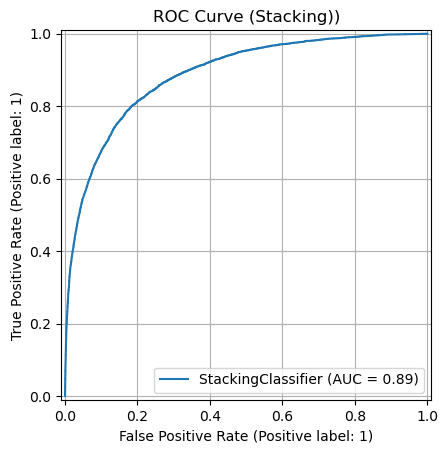

In [27]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(stacking_clf, X_test, y_test)
plt.title("ROC Curve (Stacking))")
plt.grid(True)
plt.show()

In [24]:
st_pca_submission = sub.copy()
sub_proba = stacking_clf.predict_proba(test_df)[:,1]
st_pca_submission['Exited'] = sub_proba

# 최종 제출 파일 저장
st_pca_submission.to_csv('/Users/bagminsu/Downloads/playground-series-s4e1/st_submission.csv', index=False)

In [ ]:
from sklearn.neural_network import MLPClassifier

# 1. MLPClassifier 정의
mlp = MLPClassifier(random_state= 42)

# 2. 학습 및 예측
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
y_proba = mlp.predict_proba(X_test)[:, 1]

# 3. 성능 평가
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26023
           1       0.74      0.55      0.63      6984

    accuracy                           0.86     33007
   macro avg       0.81      0.75      0.77     33007
weighted avg       0.86      0.86      0.86     33007

ROC-AUC: 0.8859319872512108


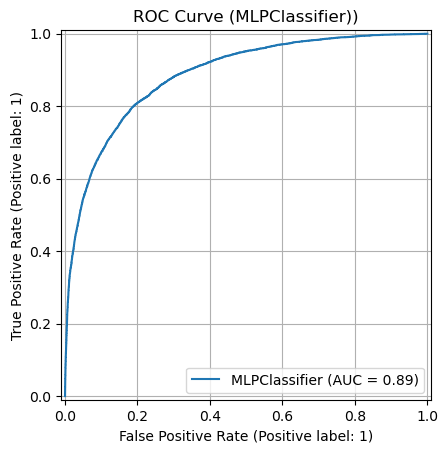

In [31]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(mlp, X_test, y_test)
plt.title("ROC Curve (MLPClassifier))")
plt.grid(True)
plt.show()

In [32]:
mlp_pca_submission = sub.copy()
sub_proba = mlp.predict_proba(test_df)[:,1]
mlp_pca_submission['Exited'] = sub_proba

# 최종 제출 파일 저장
mlp_pca_submission.to_csv('/Users/bagminsu/Downloads/playground-series-s4e1/mlp_submission.csv', index=False)

In [33]:
from sklearn.ensemble import BaggingClassifier

# 1. Bagging 정의
bagging = BaggingClassifier(random_state=42)

# 2. 학습 및 예측
bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_test)
y_proba = bagging.predict_proba(X_test)[:, 1]

# 3. 성능 평가
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     26023
           1       0.70      0.51      0.59      6984

    accuracy                           0.85     33007
   macro avg       0.79      0.72      0.75     33007
weighted avg       0.84      0.85      0.84     33007

ROC-AUC: 0.8419742460399051


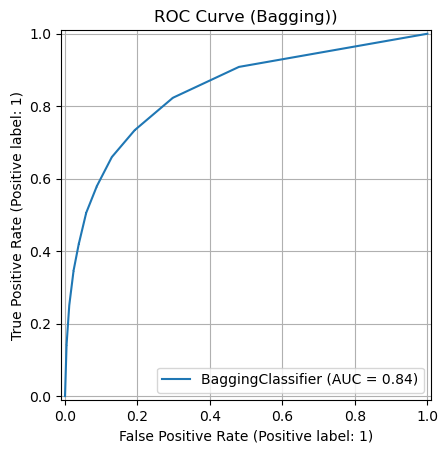

In [34]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(bagging, X_test, y_test)
plt.title("ROC Curve (Bagging))")
plt.grid(True)
plt.show()

In [36]:
bg_pca_submission = sub.copy()
bg_proba = bagging.predict_proba(test_df)[:,1]
bg_pca_submission['Exited'] = bg_proba

# 최종 제출 파일 저장
bg_pca_submission.to_csv('/Users/bagminsu/Downloads/playground-series-s4e1/bg_submission.csv', index=False)

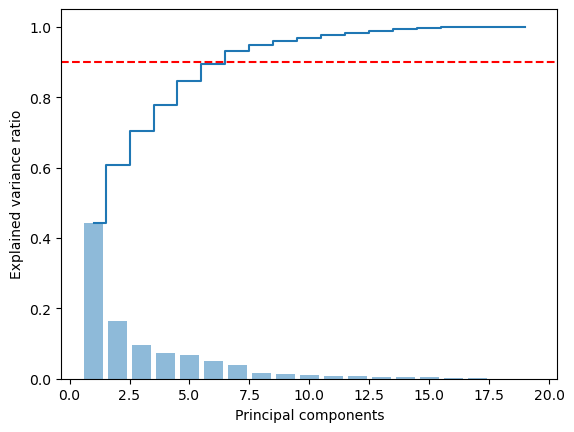

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
n_comp = len(pca.explained_variance_ratio_)  # 19개

plt.bar(range(1, n_comp + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, n_comp + 1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.axhline(y=0.9, color = 'r', linestyle = '--')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [54]:
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
test_df_pca = pca.transform(test_df)

pca_kn = kn.fit(X_train_pca, y_train)
y_pred = pca_kn.predict(X_test_pca)  
y_proba = pca_kn.predict_proba(X_test_pca)[:, 1]  

# 성능 평가
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     26023
           1       0.75      0.41      0.53      6984

    accuracy                           0.85     33007
   macro avg       0.80      0.69      0.72     33007
weighted avg       0.84      0.85      0.83     33007

ROC-AUC: 0.8639642022549532


In [55]:
kn_pca_submission = sub.copy()
kn_proba = kn.predict_proba(test_df_pca)[:,1]
kn_pca_submission['Exited'] = kn_proba

# 최종 제출 파일 저장
kn_pca_submission.to_csv('/Users/bagminsu/Downloads/playground-series-s4e1/kn_submission.csv', index=False)